# SDSC3006 Group Project

## Steel Plates Faults Dataset (27 attributes, 1941 instances)

### Loading library

In [1]:
# Dev lib
# library(diffobj)


In [2]:
# Prod  lib
library(stats)
library(ggplot2)
library(factoextra)
library(e1071)
library(caret)

library(haven)
library(hrbrthemes)
library(reshape2)
library(rpart)
library(rpart.plot)


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: lattice

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [3]:
plotCM2Heatmap <- function(table) {
   ggplot(data = melt(table), aes(x = Prediction, y = Reference, fill = value)) +
   geom_tile(color = "black") +
   scale_fill_gradient(low = "white", high = "red") +
   coord_fixed() +
   theme_ipsum() +
   theme_grey(base_size = 14) +
   theme(
      legend.position = "none",
      axis.ticks = element_blank(),
      axis.text.x = element_text(angle = 330, hjust = 0)
   )
}

### Set random seed

In [4]:
seed <- 0
print(seed)


[1] 0


### Load dataset

In [5]:
df <- read.table("Faults.NNA", col.names = as.vector(read.table("Faults27x7_var")$V1))
df.X <- scale(df[1:27])
df.Y <- data.frame(Faults = factor(names(df[28:34])[max.col(df[28:34])]))


### PCA Tranformation 

In [6]:
df.pca <- prcomp(df[, -length(df)], scale = TRUE)
df.pcaX <- df.pca$x


In [7]:
# fviz_eig(df.pca, addlabels = TRUE)
# fviz_pca_var(df.pca, col.var = "cos2", repel = TRUE)


### Split dataset

In [8]:
set.seed(seed)
rand <- sample(nrow(df), nrow(df) * 0.8)

df.train.X <- df.X[rand, ]
df.train.Y <- df.Y[rand, ]
df.train.pcaX <- df.pcaX[rand, ]

df.test.X <- df.X[-rand, ]
df.test.Y <- df.Y[-rand, ]
df.test.pcaX <- df.pcaX[-rand, ]


### Naive Bayes

In [9]:
set.seed(seed)
gnb.model <- naiveBayes(df.train.X, df.train.Y)
gnb.yPred <- predict(gnb.model, df.test.X)

cm <- confusionMatrix(gnb.yPred, df.test.Y)
cm$overall["Accuracy"]

Accuracy 
0.6118252

In [10]:
cm$table

              Reference
Prediction     Bumps Dirtiness K_Scatch Other_Faults Pastry Stains Z_Scratch
  Bumps           73         3        3           56      4      2         4
  Dirtiness        2         7        0            8      2      0         0
  K_Scatch         0         0       64            4      0      0         1
  Other_Faults     4         1        8           37      0      0         1
  Pastry           7         1        0           23     15      0         0
  Stains           4         0        1            2      0     11         0
  Z_Scratch        2         0        0            7      1      0        31

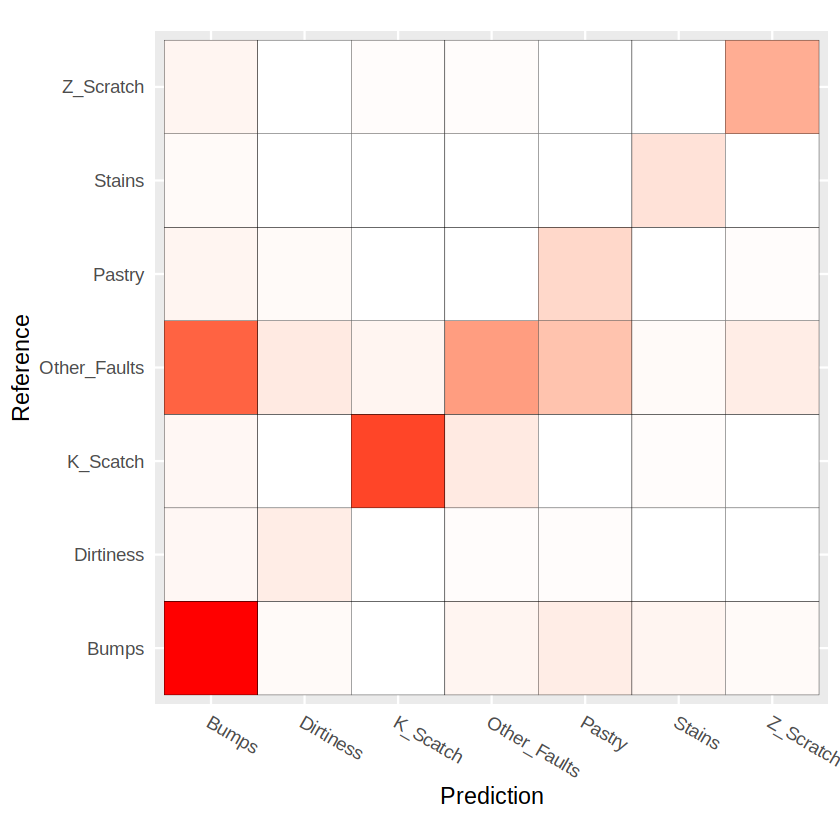

In [11]:
plotCM2Heatmap(cm$table)


### Naive Bayes with PCA

In [12]:
set.seed(seed)
gnb.pca <- naiveBayes(df.train.pcaX, df.train.Y)
gnb.yPred <- predict(gnb.pca, df.test.pcaX)

cm <- confusionMatrix(gnb.yPred, df.test.Y)
cm$overall["Accuracy"]

Accuracy 
0.9562982

In [13]:
cm$table

              Reference
Prediction     Bumps Dirtiness K_Scatch Other_Faults Pastry Stains Z_Scratch
  Bumps           88         0        0            3      0      0         0
  Dirtiness        0        11        0            0      0      0         0
  K_Scatch         0         0       71            2      0      0         0
  Other_Faults     4         1        5          132      0      2         0
  Pastry           0         0        0            0     22      0         0
  Stains           0         0        0            0      0     11         0
  Z_Scratch        0         0        0            0      0      0        37

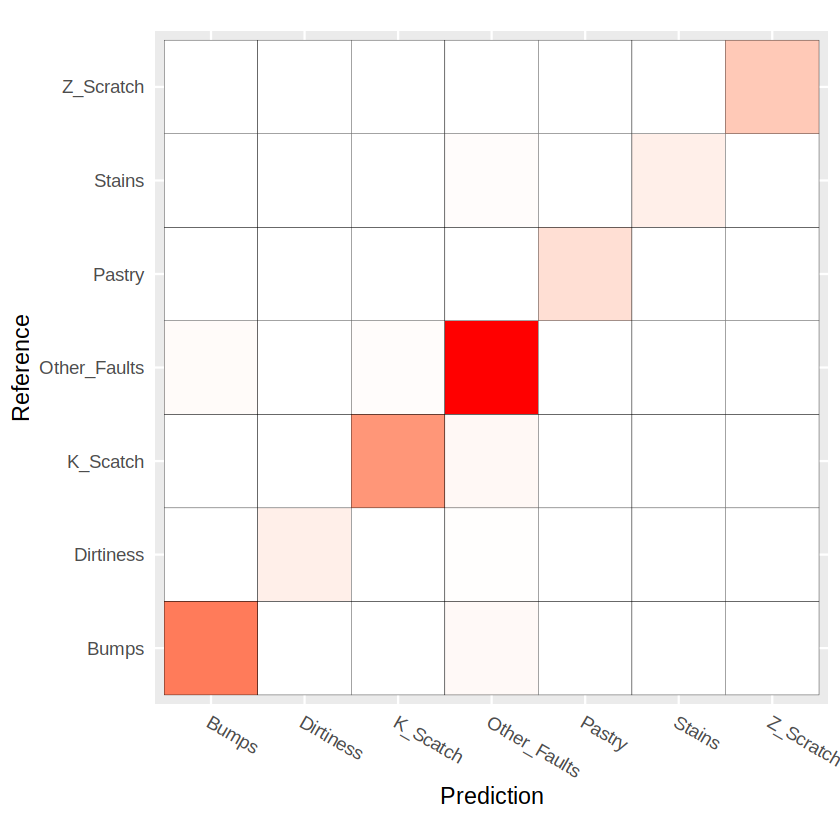

In [14]:
plotCM2Heatmap(cm$table)


dec tree

svm

knn

log reg